# Regression Discontinuity

`San Diego` is a large city in the United States that covers a fairly wide geographic area of more than 300 square miles. It’s pretty well-off too, with an average annual household income above `$85,000` as of 2019, about 50% above the national average. As you move south through the area, the scene changes a bit. There’s a little less money in some southern parts of the city. By the time you get to `San Ysidro`, the district of the city just on the Mexican border, household income has dropped to more like $50,000 or `$55,000`. The further south you go, the lower you can expect incomes to be.

But our trip through the city has nothing on what happens when we cross that border into `Tijuana`, Mexico. It took us 16 miles to drive from downtown to San Ysidro and watch incomes drop by 25%. But you could get out of the car in an area with $50,000 household income and just walk a few feet over the border into Tijuana. Suddenly and sharply, household income drops to `$20,000`.

Sure, there may be something different about the people, the opportunities, or the geography that is different in south San Diego as opposed to the downtown area that could explain some of the difference in incomes. But there’s no way that just going south explains what happens when we take one step over the border and see incomes crash. From downtown to San Ysidro there’s continuous change. But at the border it jumps. Something is fundamentally different. We have a cutoff.

Whenever some treatment is assigned discontinuously - people just on one side of a line get it, and people just on the other side of the line don’t, we can be pretty sure that the differences we see aren’t just because there’s something different about how far south they are. Without the line they might be a little different, but not that different. The big change we can attribute to that line separating Mexico and the US.

This is the idea behind `regression discontinuity`. Compare people just on either side of a cutoff. Without the cutoff they’d likely be pretty similar. So if they’re different, we can probably attribute the difference to whatever it is that happens at that cutoff.

**Regression discontinuity focuses on treatment that is assigned at a cutoff. Just to one side, no treatment. Just to the other, treatment!**

### Terminology

- `Running variable`: The running variable, also known as a forcing variable, is the variable that determines whether you’re treated or not. For example, if a doctor takes your blood pressure and will assign you a blood-pressure reducing medicine if your systolic blood pressure is above 135, then your blood pressure is the running variable.

- `Cutoff`: The cutoff is the value of the running variable that determines whether you get treatment. Using the same blood pressure example, the cutoff in this case is a systolic blood pressure of 135. If you’re above 135, you get the medicine. If you’re below 135, you don’t.

- `Bandwidth`: It’s reasonable to think that people just barely to either side of the cutoff are basically the same other than for the cutoff. But people farther away (say, downtown San Diego vs. further inside of Mexico) might be different for reasons other than the cutoff. The bandwidth is how much area around the cutoff you’re willing to consider comparable. Ten feet to either side of the US/Mexico border? 1000 feet? 80 miles?

### When can we apply regression discontinuity? 

What we’re looking for is some sort of treatment that is assigned based on a cutoff. There’s the running variable that determines treatment. And there’s some cutoff value. If you’re just to one side of the cutoff value, you don’t get treated. If you’re to the other side, you do get treated. Plus, since our strategy is going to be assuming that people close to the cutoff are effectively randomly assigned, there shouldn’t be any obvious impediments to that randomness - people shouldn’t be able to manipulate the running variable so as to choose their own treatment, and also the people who choose what the cutoff is shouldn’t be able to make that choice in response to finding out who has which running variable values.

![](image\regressiondiscontinuity-dag-1.png)

Here we have a $RunningVariable$ with a back door through $Z$ (which perhaps we can’t control for). $RunningVariable$ also has a direct effect on the $Outcome$.

Now, we aren’t actually interested in the effect of $RunningVariable$. We’re interested in the effect of $Treatment$. $Treatment$ has a back door through $RunningVariable$. However, if we control for all the variation in $RunningVariable$ except for being above the cutoff, then we can close that back door, identifying the effect of $Treatment$ on $Outcome$.


Based on the diagram it sort of seems like regression discontinuity is just a case of controlling for a variable ($RunningVariable$) and saying we’ve identified the effect. But it’s a bit more interesting than that. We’re actually isolating a front-door path, not closing back doors. By only looking right around the cutoff we are getting rid of any variation that doesn’t lie on the $AboveCutoff \rightarrow Treatment \rightarrow Outcome$ path. Nothing else should really be varying once we limit ourselves to that cutoff, so all the other variables go away!

So, sure, in Figure 20.1 we could identify the effect by doing regular ol’ statistical adjustment for $RunningVariable$
. But what if there were other back doors? Perhaps even back doors for $Treatment$ itself, for example if $Z \rightarrow Treatment$ were on the graph? 
Controlling for $RunningVariable$ wouldn’t solve the problem, but regression discontinuity would, by isolating $AboveCutoff \rightarrow Treatment \rightarrow Outcome$ and letting us ignore any other arrows heading into $Treatment$.

### So how does regression discontinuity do all this cool stuff, exactly? 

We can perform regression discontinuity by making only a few basic choices. Once we’ve done that, the process is pretty straightforward.

- Choose a method for predicting the outcome on each side of the cutoff
- Choose a bandwidth (optional)

That’s it! Let’s put these choices to work on some simulated data. You can see the process all worked out in Figure.

![](image\regressiondiscontinuity-animation-1.png)

***The cut-off point could be deterministic or probabilistic.***

1. In case of deterministic designs, our cut-off point is sharp (singular) value. This is also called a `sharp design`. The probability of getting the treatment jumps from 0 to 1 at the threshold.

![](image\rdd.png)

2. The design with probabilistic cut-off point is called a `fuzzy design`. The probability also jumps here, but in a less dramatic manner.

![](image\rdd_fuzzy.png)

## Regression Discontinuity with Ordinary Least Squares

Imagine that you have a treatment variable $T$ and potential outcomes $Y_0$ and $Y_1$. The treatment T is a discontinuous function of an observed running variable $R$ such that

$
D_i = \mathcal{1}\{R_i>c\}
$

In other words, this is saying that treatment is zero when $R$ is below a threshold $c$ and one otherwise. This means that we get to observe $Y_1$ when $R>c$ and $Y_0$ when $R<c$. To wrap our head around this, think about the potential outcomes as 2 functions that we can't observe entirely. Both $Y_0(R)$ and $Y_1(R)$ are there, we just can't see that. The threshold acts as a switch that allows us to see one or the other of those function, but never both

There are many ways to predict the outcome just on either side of the regression, but we’ll start with a very simple regression-based approach:

$
Y = \beta_0 + \beta_1(Running-Cutoff) + \beta_2Treated + \beta_3(Running-Cutoff)\times Treated + \varepsilon
$

or

$
y_i = \beta_0 + \beta_1 * r_i + \beta_2 * \mathcal{1}\{r_i>c\} + \beta_3 * r_i *\mathcal{1}\{r_i>c\}
$


- The intercept $\beta_0$ and the slope $\beta_1$, to the untreated side of the cutoff,

- The intercept $\beta_0 + \beta_2$ and the slope $\beta_1 + \beta_3$ to the treated side of the cutoff.

Since we centered the running variable to be 0 at the cutoff, the intercept of each of these lines is our prediction at the cutoff. So our estimate of how big the jump is from one line to the other at the cutoff is simply the change in intercepts, or $(\beta_0 + \beta_2) - (\beta_0) = \beta_2$. $\beta_2$ gives us our estimate of the regression discontinuity effect.

## Is Alcohol Killing You?

A very relevant public policy question is what should be the minimal drinking age. Most countries, Brazil included, set it to be 18 year, but in the US (most states) it is currently 21. So, is it the case that the US is being overly prudent and that they should lower their minimal drinking age? Or is it the case that other countries should make their legal drinking age higher? 

One way to look at this question is from a [mortality rate perspective (Carpenter and Dobkin, 2009)](https://www.aeaweb.org/articles?id=10.1257/app.1.1.164). From the public policy standpoint, one could argue that we should lower the mortality rate as much as possible. If alcohol consumption increases the mortality rate by a lot, we should avoid lowering the minimum drinking age. This would be consistent with the objective of lowering deaths caused by alcohol consumption.

To estimate the impacts of alcohol on death, we could use the fact that legal drinking age imposes a discontinuity on nature. In the US, those just under 21 years don't drink (or drink much less) while those just older than 21 do drink. This means that the probability of drinking jumps at 21 years and that is something we can explore with an RDD.

```note
You could also argue that turning 21 increases the probability of drinking alcohol, since it is possible to drink it before that age, even though not legally. This would technically make this a case of Fuzzy RD Design, something we'll explore later in this chapter.
```

## Prepare Notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from joblib import Parallel, delayed 

## Read Data

To do so we can grab some mortality data aggregated by age. Each row is the average age of a group of people and the average mortality by all causes (`all`), by moving vehicle accident (`mva`) and by suicide (`suicide`). 

In [2]:
drinking_pre = pd.read_csv("./data/drinking.csv")
drinking_pre.head()

,agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,homicidefitted,suicide,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted
0,19.068493,92.825400,91.706150,16.617590,16.738130,76.207820,74.968010,0.639138,0.794345,16.316818,16.284573,11.203714,11.592100,35.829327,34.817780,3.872425,3.448835,8.534373,8.388236
1,19.150684,95.100740,91.883720,18.327684,16.920654,76.773056,74.963066,0.677409,0.837575,16.859964,16.270697,12.193368,11.593611,35.639256,34.633890,3.236511,3.470022,8.655786,8.530174
2,19.232876,92.144295,92.049065,18.911053,17.098843,73.233240,74.950226,0.866443,0.877835,15.219254,16.262882,11.715812,11.595129,34.205650,34.446735,3.202071,3.492069,8.513741,8.662681
3,19.315070,88.427760,92.202140,16.101770,17.272680,72.325980,74.929470,0.867308,0.915115,16.742825,16.261148,11.275010,11.596655,32.278957,34.256300,3.280689,3.514980,8.258285,8.785728
4,19.397260,88.704940,92.342920,17.363520,17.442156,71.341415,74.900760,1.019163,0.949407,14.947726,16.265510,10.984314,11.598189,32.650967,34.062588,3.548198,3.538755,8.417533,8.899288


In [3]:
drinking = pd.read_csv("./data/drinking.csv", usecols = ["agecell", "all", "mva", "suicide"])
drinking.head()

,agecell,all,suicide,mva
0,19.068493,92.825400,11.203714,35.829327
1,19.150684,95.100740,12.193368,35.639256
2,19.232876,92.144295,11.715812,34.205650
3,19.315070,88.427760,11.275010,32.278957
4,19.397260,88.704940,10.984314,32.650967


Here, $RunningVariable$ is `agecell`. We will centralize the running variable `agecell` at the threshold 21.

In [4]:
drinking["agecell"] -= 21

drinking.head()

,agecell,all,suicide,mva
0,-1.931507,92.825400,11.203714,35.829327
1,-1.849316,95.100740,12.193368,35.639256
2,-1.767124,92.144295,11.715812,34.205650
3,-1.684930,88.427760,11.275010,32.278957
4,-1.602740,88.704940,10.984314,32.650967


If we plot the multiple outcome variables (`all`, `mva`, `suicide`) with the runing variable on the x axis, we get some visual cue about some sort of jump in mortality as we cross the legal drinking age.

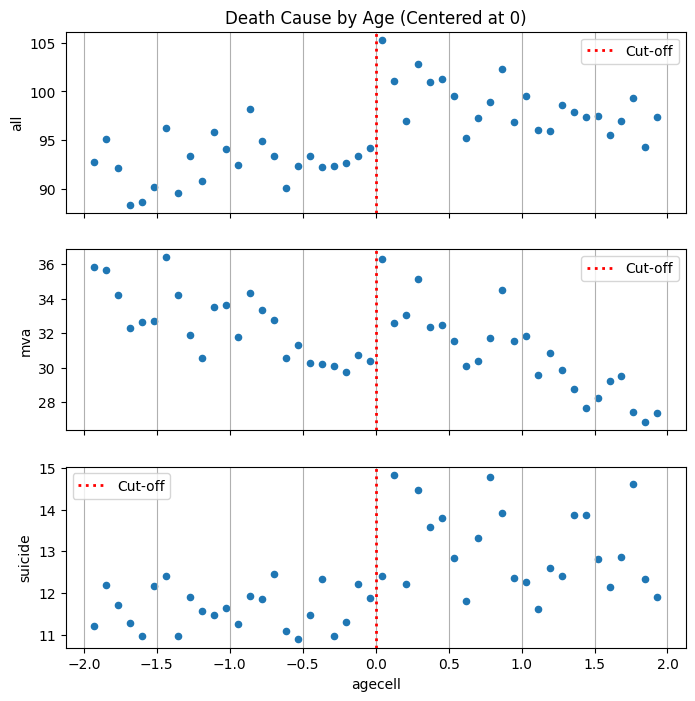

In [5]:
plt.figure(figsize=(8,8))

ax = plt.subplot(3,1,1)
drinking.plot.scatter(x="agecell", y="all", ax=ax)
plt.title("Death Cause by Age (Centered at 0)")
ax.grid(axis='x')
ax.axvline(x = 0, label = 'Cut-off', color = 'red', lw = 2, ls = ":")
ax.legend()

ax = plt.subplot(3,1,2, sharex=ax)
drinking.plot.scatter(x="agecell", y="mva", ax=ax)
ax.grid(axis='x')
ax.axvline(x = 0, label = 'Cut-off', color = 'red', lw = 2, ls = ":")
ax.legend()

ax = plt.subplot(3,1,3, sharex=ax)
drinking.plot.scatter(x="agecell", y="suicide", ax=ax)
ax.grid(axis='x')
ax.axvline(x = 0, label = 'Cut-off', color = 'red', lw = 2, ls = ":")
ax.legend();


There are some cues, but we need more than that. What exactly is the effect of drinking on mortality at the threshold? And what is the standard error on that estimate?

## RDD Estimation

The key assumption that RDD relies on is the smoothness of the potential outcome at the threshold. Formally, the limits of the potential outcomes as the running variable approaches the threshold from the right and from the left should be the same.

$$
\lim_{r \to c^-} E[Y_{ti}|R_i=r] = \lim_{r \to c^+} E[Y_{ti}|R_i=r]
$$

If this holds true, we can find the causal effect at the threshold

$$
\begin{align}
\lim_{r \to c^+} E[Y_{ti}|R_i=r] - \lim_{r \to c^-} E[Y_{ti}|R_i=r]=&\lim_{r \to c^+} E[Y_{1i}|R_i=r] - \lim_{r \to c^-} E[Y_{0i}|R_i=r] \\
=& E[Y_{1i}|R_i=r] - E[Y_{0i}|R_i=r] \\
=& E[Y_{1i} - Y_{0i}|R_i=r]
\end{align}
$$

This is, in its own way, a sort of `Local Average Treatment Effect (LATE)`, since we can only know it at the threshold. In this setting, we can think of RDD as a local randomized trial. For those at the threshold, the treatment could have gone either way and, by chance, some people fell below the threshold, and some people fell above. In our example, at the same point in time, some people are just above 21 years and some people are just below 21. What determines this is if someone was born some days later or not, which is pretty random. For this reason, RDD provides a very compelling causal story. It is not the golden standard of RCT, but it is close. 

Now, to estimate the treatment effect at the threshold, all we need to do is estimate both of the limits in the formula above and compare them. The simplest way to do that is by running a linear regression.

To make it work, we interact a dummy for being above the threshold with the running variable

$
y_i = \beta_0 + \beta_1 r_i + \beta_2 \mathcal{1}\{r_i>c\} + \beta_3 \mathcal{1}\{r_i>c\} r_i
$

Essentially, this is the same as fitting a linear regression above the threshold and another below it. The parameter $\beta_0$ is the intercept of the regression below the threshold and $\beta_0+\beta_2$ is the intercept for the regression above the threshold.

Here is where the trick of centering the running variable at the threshold comes into play. After this pre-processing step, the threshold becomes zero. This causes the intercept $\beta_0$ to be the predicted value at the threshold, for the regression below it. In other words, $\beta_0=\lim_{r \to c^-} E[Y_{ti}|R_i=r]$. By the same reasoning, $\beta_0+\beta_2$ is the limit of the outcome from above. Wich means, that

$
\lim_{r \to c^+} E[Y_{ti}|R_i=r] - \lim_{r \to c^-} E[Y_{ti}|R_i=r]=\beta_2=E[ATE|R=c]
$

Here is what this looks like in code for the case where we want to estimate the effect of alcohol consumption on death by all causes at 21 years.

In [6]:
rdd_df = drinking.assign(threshold=(drinking["agecell"] > 0).astype(int))
rdd_df.head()

,agecell,all,suicide,mva,threshold
0,-1.931507,92.825400,11.203714,35.829327,0
1,-1.849316,95.100740,12.193368,35.639256,0
2,-1.767124,92.144295,11.715812,34.205650,0
3,-1.684930,88.427760,11.275010,32.278957,0
4,-1.602740,88.704940,10.984314,32.650967,0


## Model building and Iterating

In [7]:
model = smf.ols("all~agecell*threshold", rdd_df).fit()

### Result

In [8]:
# model.summary()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,93.6184,0.932,100.399,0.000,91.739,95.498
agecell,0.8270,0.819,1.010,0.318,-0.823,2.477
threshold,7.6627,1.319,5.811,0.000,5.005,10.320
agecell:threshold,-3.6034,1.158,-3.111,0.003,-5.937,-1.269


- This model is telling us that `mortality increases by 7.6627` points with the consumption of alcohol. 
- Another way of putting this is that alcohol increases the chance of death by all causes by `8%`, i.e., (100*((7.6627+93.6184)/93.6184 - 1)). 
    - Average Treatment Effect (%), ${ate\_pct}{ = }{100}{\times}\bigg(\frac{{\beta_2} {+} {\beta_0}}{\beta_0}{-}{1}\bigg)$
- Notice that this also gives us `standard errors` for our causal effect estimate. In this case, the effect is statistically significant, since the **p-value is below 0.01**.

If we want to verify this model visually, we can show the predicted values on the data that we have. You can see that it is as though we had 2 regression models: one for those above the threshold and one for below it.

In [9]:
rdd_df['ols_prediction'] = model.fittedvalues
rdd_df.head()

,agecell,all,suicide,mva,threshold,ols_prediction
0,-1.931507,92.825400,11.203714,35.829327,0,92.021023
1,-1.849316,95.100740,12.193368,35.639256,0,92.088994
2,-1.767124,92.144295,11.715812,34.205650,0,92.156967
3,-1.684930,88.427760,11.275010,32.278957,0,92.224941
4,-1.602740,88.704940,10.984314,32.650967,0,92.292911


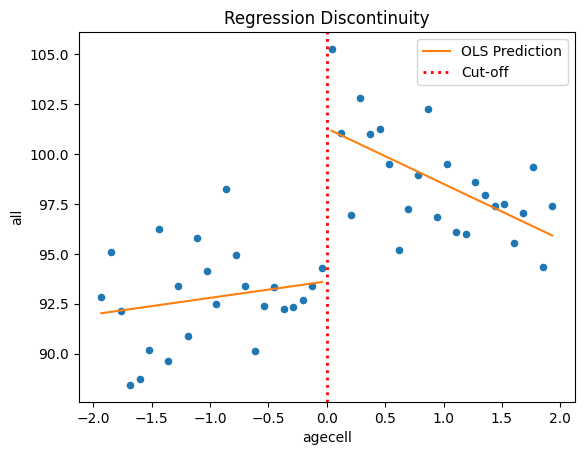

In [10]:
ax = rdd_df.plot.scatter(x="agecell", y="all", color="C0")

rdd_df.plot(x="agecell", y="ols_prediction", ax=ax, color="C1", label = "OLS Prediction")

ax.axvline(x = 0, label = 'Cut-off', color = 'red', lw = 2, ls = ":")
ax.legend()

plt.title("Regression Discontinuity");

If we do the same for the other causes, this is what we get.

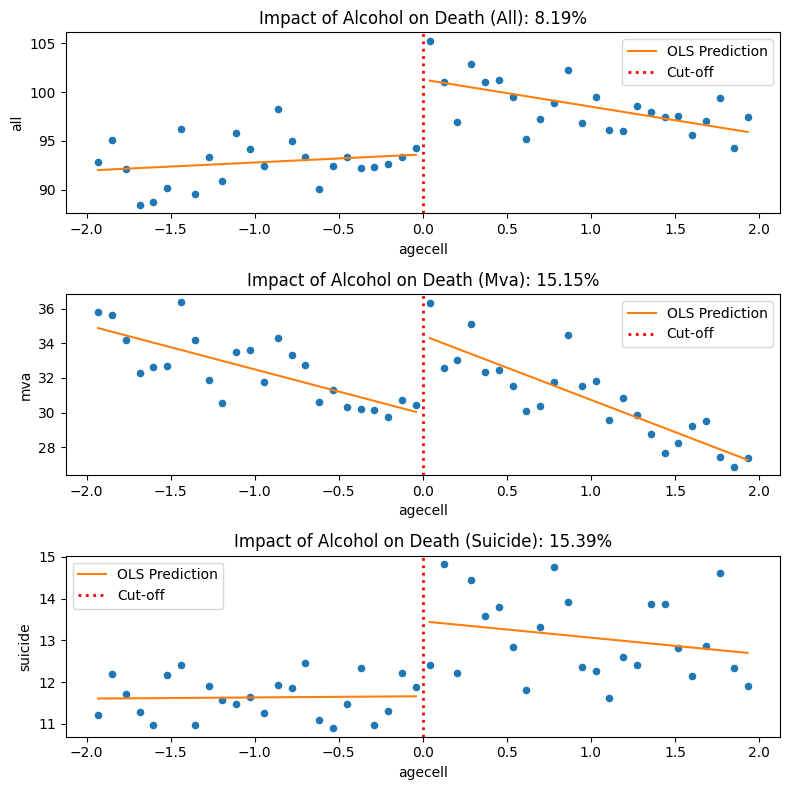

In [11]:
plt.figure(figsize=(8,8))

for p, cause in enumerate(["all", "mva", "suicide"], 1):
    ax = plt.subplot(3,1,p)
    rdd_df.plot.scatter(x="agecell", y=cause, ax=ax)
    
    m = smf.ols(f"{cause}~agecell*threshold", rdd_df).fit()
    
    # Formula of avaerage treatment effect
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    
    rdd_df.assign(ols_predictions = m.fittedvalues).plot(x="agecell", y="ols_predictions", ax=ax, color="C1", label = "OLS Prediction")
    
    ax.axvline(x = 0, label = 'Cut-off', color = 'red', lw = 2, ls = ":")
    ax.legend()
    
    plt.title(f"Impact of Alcohol on Death ({cause.title()}): {np.round(ate_pct, 2)}%")

plt.tight_layout()

RDD is telling us that alcohol increases the chance of death by suicide and car accidents by 15%, which is a pretty significant amount. These results are compelling arguments to not lower the drinking age, if we want to minimize mortality rates.

### Kernel Weighting

![](image\regressiondiscontinuity-kernel-1.png)

Regression Discontinuity relies heavily on the extrapolations properties of linear regression. Since we are looking at the values at the beginning and end of 2 regression lines, we better get those limits right. What can happen is that regression might focus too much on fitting the other data points at the cost of a poor fit at the threshold. If this happens, we might get the wrong measure of the treatment effect.

One way to solve this is to give higher weights for the points that are closer to the threshold. There are many ways to do this, but a popular one is to reweight the samples with the **triangular kernel**

$
K(R, c, h) = \mathcal{1}\{|R-c| \leq h\} * \bigg(1-\frac{|R-c|}{h}\bigg)
$

The first part of this kernel is an indicator function to whether we are close to the threshold. How close? This is determined by a bandwidth parameter $h$. The second part of this kernel is a weighting function. As we move away from the threshold, the weights get smaller and smaller. These weights are divided by the bandwidth. If the bandwidth is large, the weights get smaller at a slower rate. If the bandwidth is small, the weights quickly go to zero. 

To make it easier to understand, here is what the weights look like for this kernel applied to our problem. I've set the bandwidth to be 1 here, meaning we will only consider data from people that are no older than 22 years and no younger than 20 years.

In [12]:
def kernel(R, c, h):
    indicator = (np.abs(R-c) <= h).astype(float)
    return indicator * (1 - np.abs(R-c)/h)

In [13]:
k_weight = kernel(rdd_df["agecell"], c=0, h=1)

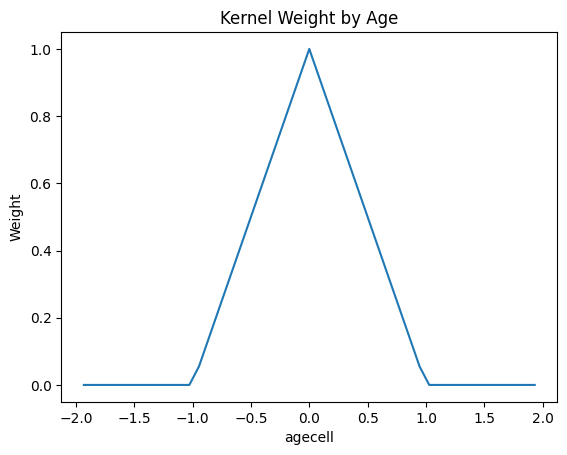

In [14]:
plt.plot(rdd_df["agecell"], k_weight)
plt.xlabel("agecell")
plt.ylabel("Weight")
plt.title("Kernel Weight by Age");

If we apply these weights to our original problem, the impact of alcohol gets bigger, at least for all causes. It jumps from 7.6627 to 9.7004. The result remains very significant. Also, notice that I'm using `wls` instead of `ols`

In [15]:
model = smf.wls("all~agecell*threshold", rdd_df,
                weights=k_weight).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,93.2002,0.731,127.429,0.000,91.726,94.674
agecell,0.4109,1.789,0.230,0.819,-3.196,4.017
threshold,9.7004,1.034,9.378,0.000,7.616,11.785
agecell:threshold,-7.1759,2.531,-2.835,0.007,-12.276,-2.075


In [16]:
rdd_df['wls_prediction'] = model.fittedvalues
rdd_df.head()

,agecell,all,suicide,mva,threshold,ols_prediction,wls_prediction
0,-1.931507,92.825400,11.203714,35.829327,0,92.021023,92.406648
1,-1.849316,95.100740,12.193368,35.639256,0,92.088994,92.440417
2,-1.767124,92.144295,11.715812,34.205650,0,92.156967,92.474187
3,-1.684930,88.427760,11.275010,32.278957,0,92.224941,92.507958
4,-1.602740,88.704940,10.984314,32.650967,0,92.292911,92.541727


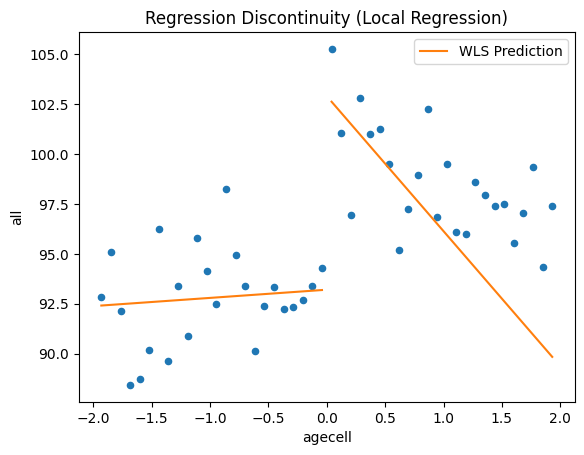

In [17]:
ax = rdd_df.plot.scatter(x="agecell", y="all", color="C0")

rdd_df.plot(x="agecell", y="wls_prediction", ax=ax, color="C1", label = "WLS Prediction")

plt.title("Regression Discontinuity (Local Regression)");

And here is what it looks like for the other causes of death. Notice how the regression on the right is more negatively sloped since it disconsiders the right most points. 

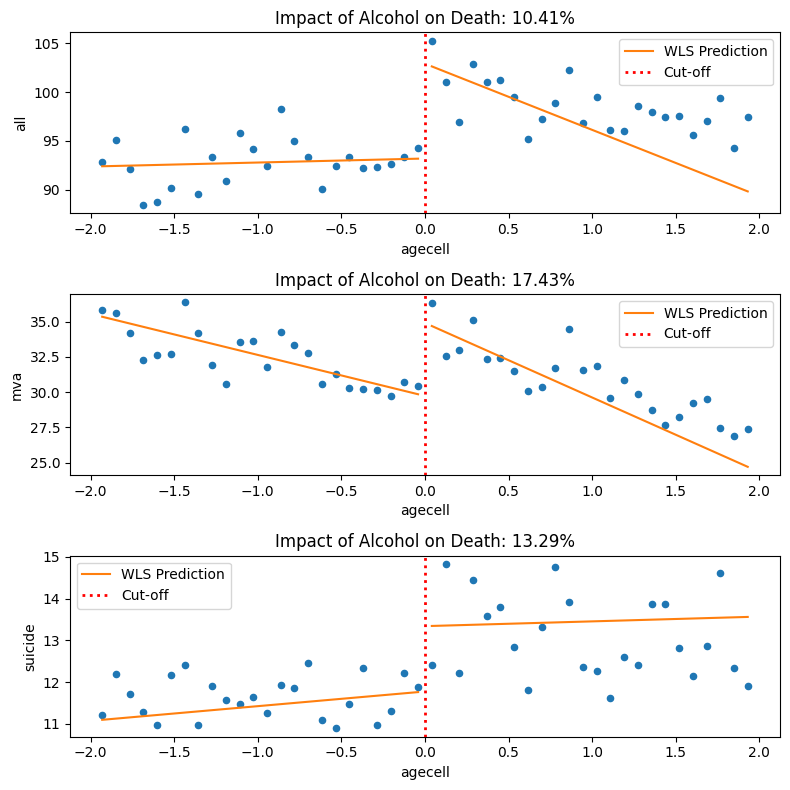

In [18]:
plt.figure(figsize=(8,8))
weights = k_weight

for p, cause in enumerate(["all", "mva", "suicide"], 1):
    ax = plt.subplot(3,1,p)
    
    rdd_df.plot.scatter(x="agecell", y=cause, ax=ax)
    
    m = smf.wls(f"{cause}~agecell*threshold", rdd_df, weights=weights).fit()
    
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    
    rdd_df.assign(wls_predictions=m.fittedvalues).plot(x="agecell", y="wls_predictions", ax=ax, color="C1", label = "WLS Prediction")
    
    ax.axvline(x = 0, label = 'Cut-off', color = 'red', lw = 2, ls = ":")
    ax.legend()
    
    plt.title(f"Impact of Alcohol on Death: {np.round(ate_pct, 2)}%")

plt.tight_layout()

With the exception of suicide, it looks like adding the kernel weight made the negative impact on alcohol bigger. Once again, if we want to minimize the death rate, we should NOT recommend lowering the legal drinking age, since there is a clear impact of alcohol on the death rates.

This simple case covers what happens when regression discontinuity design works perfectly. Next, we will see some diagnostics that we should run in order to check how much we can trust RDD and talk about a topic that is very dear to our heart: the effect of education on earnings.

## Sheepskin Effect and Fuzzy RDD

When it comes to the effect of education on earnings, there are two major views in economics. The first one is the widely known argument that education increases human capital, increasing productivity and thus, earnings. In this view, education actually changes you for the better. Another view is that education is simply a signaling mechanism. It just puts you through all these hard tests and academic tasks. If you can make it, it signals to the market that you are a good employee. In this way, education doesn't make you more productive. It only tells the market how productive you have always been. What matters here is the diploma. If you have it, you will be paid more. We refer to this as the **`sheepskin effect`**, since diplomas were printed in sheepskin in the past.

To test this hypothesis, [Clark and Martorell](https://faculty.smu.edu/millimet/classes/eco7321/papers/clark%20martorell%202014.pdf) used regression discontinuity to measure the effect of graduating 12th grade on earnings. In order to do that, they had to think about some running variable where students that fall above it graduate and those who fall below it, don't. They found such data in the Texas education system.

In order to graduate in Texas, one has to pass an exam. Testing starts at 10th grade and students can do it multiple times, but eventually, they face a last chance exam at the end of 12th grade. The idea was to get data from students who took those last chance exams and compare those that had barely failed it to those that barely passed it. These students will have very similar human capital, but different signaling credentials. Namely, those that barely passed it, will receive a diploma. 

### Read Data

In [19]:
sheepskin_pre = pd.read_csv("./data/sheepskin.csv")
sheepskin_pre.head()

,minscore,person_years,avgearnings,receivehsd,n
0,-30.0,24.0,11845.086,0.416667,12
1,-29.0,104.0,9205.679,0.387097,31
2,-28.0,146.0,8407.745,0.318182,44
3,-27.0,137.0,11114.087,0.377778,45
4,-26.0,227.0,10814.624,0.306667,75


In [20]:
sheepskin = pd.read_csv("./data/sheepskin.csv", usecols = ["avgearnings", "minscore", "receivehsd", "n"])
sheepskin.head()

,minscore,avgearnings,receivehsd,n
0,-30.0,11845.086,0.416667,12
1,-29.0,9205.679,0.387097,31
2,-28.0,8407.745,0.318182,44
3,-27.0,11114.087,0.377778,45
4,-26.0,10814.624,0.306667,75


Once again, this data is grouped by the running variable. It contains not only the running variable (minscore, already centered at zero) and the outcome (avgearnings), but it also has the probability of receiving a diploma in that score cell and the size of the call (n). So, for example, out of the 12 students in the cell -30 below the score threshold, only 5 were able to get the diploma (12 * 0,416). 

This means that there is some slippage in the treatment assignment. Some students that are below the passing threshold managed to get the diploma anyway. Here, the regression discontinuity is **fuzzy**, rather than sharp. Notice how the probability of getting the diploma doesn't jump from zero to one at the threshold. But it does jump from something like 50% to 90%.

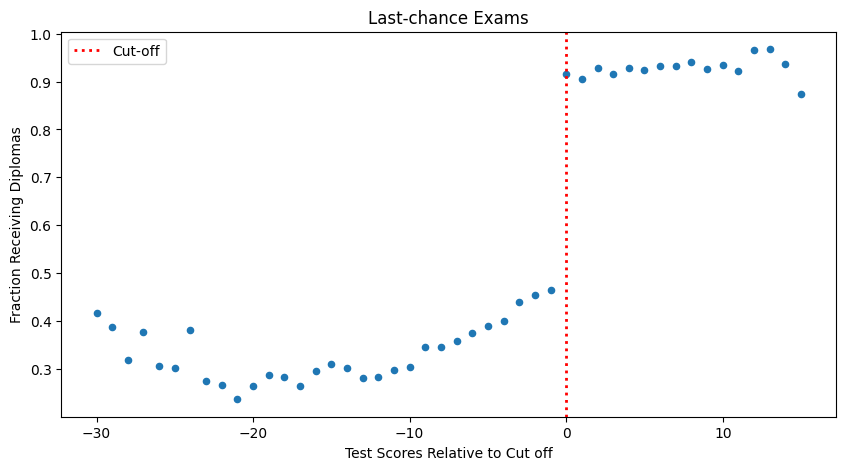

In [21]:
sheepskin.plot.scatter(x="minscore", y="receivehsd", figsize=(10,5))

plt.axvline(x = 0, label = 'Cut-off', color = 'red', lw = 2, ls = ":")
plt.legend()

plt.xlabel("Test Scores Relative to Cut off")
plt.ylabel("Fraction Receiving Diplomas")
plt.title("Last-chance Exams");

We can think of fuzzy RD as a sort of non compliance. Passing the threshold should make everyone receive the diploma, but some students, the never takers, don’t get it. Likewise, being below the threshold should prevent you from getting a diploma, but some students, the always takers, manage to get it anyway. 

Just like when we have the potential outcome, we have the potential treatment status in this situation. $T_1$ is the treatment everyone would have received had they been above the threshold. $T_0$ is the treatment everyone would have received had they been below the threshold. As you've might have noticed, we can think of the **threshold as an Instrumental Variable**. Just as in IV, if we naively estimate the treatment effect, it will be biased towards zero. 

![](image\rdd_fuzzy.png)

The probability of treatment being less than one, even above the threshold, makes the outcome we observe less than the true potential outcome $Y_1$. By the same token, the outcome we observe below the threshold is higher than the true potential outcome $Y_0$. This makes it look like the treatment effect at the threshold is smaller than it actually is and we will have to use IV techniques to correct for that.

Just like when we've assumed smoothness on the potential outcome, we now assume it for the potential treatment. Also, we need to assume monotonicity, just like in IV. In case you don't remember, it states that $T_{i1}>T_{i0} \ \forall i$. This means that crossing the threshold from the left to the right only increases your chance of getting a diploma (or that there are no defiers). With these 2 assumptions, we have a Wald Estimator for LATE.

$$
\dfrac{\lim_{r \to c^+} E[Y_i|R_i=r] - \lim_{r \to c^-} E[Y_i|R_i=r]}{\lim_{r \to c^+} E[T_i|R_i=r] - \lim_{r \to c^-} E[T_i|R_i=r]} = E[Y_{1i} - Y_{0i} | T_{1i} > T_{0i}, R_i=c]
$$

Notice how this is a local estimate in two senses. First, it is local because it only gives the treatment effect at the threshold $c$. This is the RD locality. Second, it is local because it only estimates the treatment effect for the compliers. This is the IV locality.

To estimate this, we will use 2 linear regression. The numerator can be estimated just like we've done before. To get the denominator, we simply replace the outcome with the treatment. But first, let's talk about a sanity check we need to run to make sure we can trust our RDD estimates.

### The McCrary Test

One thing that could break our RDD argument is if people can manipulate where they stand at the threshold. In the sheepskin example this could happen if students just below the threshold found a way around the system to increase their test score by just a bit. Another example is when you need to be below a certain income level to get a government benefit. Some families might lower their income on purpose, just to be just eligible for the program.

In these sorts of situations, we tend to see a phenomenon called bunching on the density of the running variable. This means that we will have a lot of entities just above or just below the threshold. To check for that, we can plot the density function of the running variable and see if there are any spikes around the threshold. For our case, the density is given by the `n` column in our data.

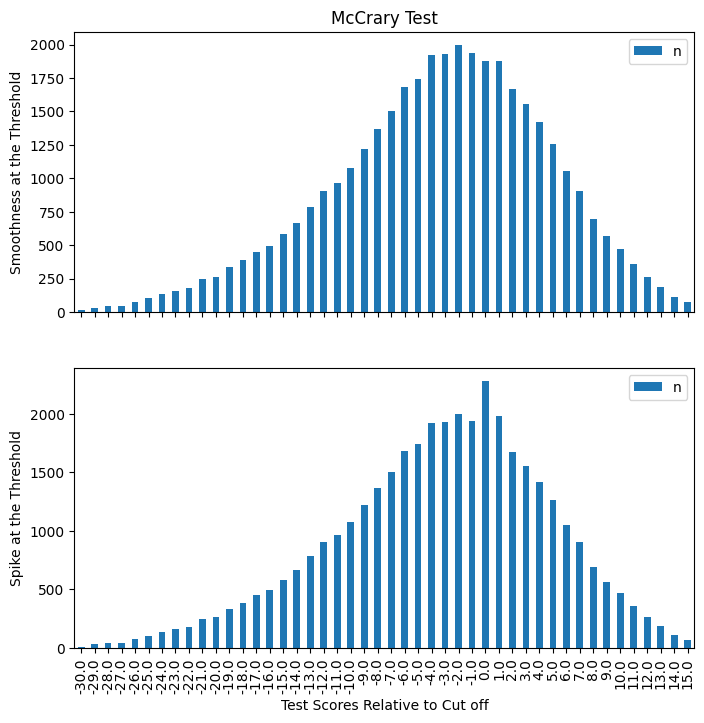

In [22]:
plt.figure(figsize=(8,8))

ax = plt.subplot(2,1,1)
sheepskin.plot.bar(x="minscore", y="n", ax=ax)
plt.title("McCrary Test")
plt.ylabel("Smoothness at the Threshold")

ax = plt.subplot(2,1,2, sharex=ax)
sheepskin.replace({1877:1977, 1874:2277}).plot.bar(x="minscore", y="n", ax=ax)
plt.xlabel("Test Scores Relative to Cut off")
plt.ylabel("Spike at the Threshold");

The first plot shows how our data density looks like. As we can see, there are no spikes around the threshold, meaning there is no bunching. Students are not manipulating where they fall on the threshold. Just for illustrative purposes, the second plot shows what bunching would look like if students could manipulate where they fall on the threshold. We would see a spike in the density for the cells just above the threshold, since many students would be on that cell, barely passing the exam. 

Getting this out of the way, we can go back to estimate the sheepskin effect. As I've said before, the numerator of the Wald estimator can be estimated just like we did in the Sharp RD. Here
- we will use as weight the kernel with a bandwidth of 15. Since we also have the cell size, we will multiply the kernel by the sample size to get a final weight for the cell.

In [23]:
sheepskin_rdd = sheepskin.assign(threshold=(sheepskin["minscore"]>0).astype(int))
sheepskin_rdd.head()

,minscore,avgearnings,receivehsd,n,threshold
0,-30.0,11845.086,0.416667,12,0
1,-29.0,9205.679,0.387097,31,0
2,-28.0,8407.745,0.318182,44,0
3,-27.0,11114.087,0.377778,45,0
4,-26.0,10814.624,0.306667,75,0


In [24]:
k_15weight = kernel(sheepskin_rdd["minscore"], c=0, h=15) * sheepskin_rdd["n"]

In [25]:
model = smf.wls("avgearnings~minscore*threshold",
                sheepskin_rdd,
                weights=k_15weight).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.399e+04,83.678,167.181,0.000,1.38e+04,1.42e+04
minscore,181.6636,16.389,11.084,0.000,148.588,214.739
threshold,-97.7571,145.723,-0.671,0.506,-391.839,196.325
minscore:threshold,18.1955,30.311,0.600,0.552,-42.975,79.366


This is telling us that the effect of a `diploma is -97.7571`, but this is `not statistically significant` (P-value of 0.5). If we plot these results, we get a very continuous line at the threshold. More educated people indeed make more money, but there isn't a jump at the point where they receive the 12th grade diploma. This is an argument in favor of the view that says that **education increases earnings by making people more productive, rather than being just a signal to the marker**. In other words, **there is no sheepskin effect**. 

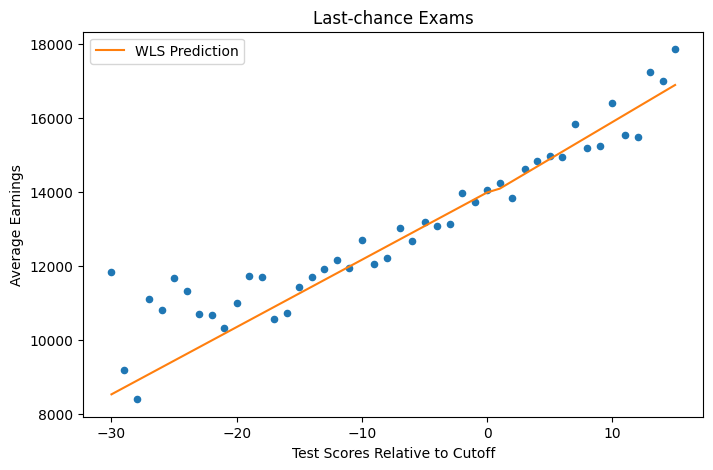

In [26]:
ax = sheepskin_rdd.plot.scatter(x="minscore", y="avgearnings", color="C0")
sheepskin.assign(wls_predictions=model.fittedvalues).plot(x="minscore", y="wls_predictions", ax=ax, color="C1", figsize=(8,5), label = "WLS Prediction")
plt.legend()
plt.xlabel("Test Scores Relative to Cutoff")
plt.ylabel("Average Earnings")
plt.title("Last-chance Exams");

However, as we know from the way non compliance bias works, this result is biased towards zero. To correct for that, we need to scale it by the first stage and get the `Wald estimator`. Unfortunately, there isn't a good Python implementation for this, so we will have to do it manually and use bootstrap to get the standard errors.

The code below runs the numerator of the `Wald estimator` just like we did before and also constructs the denominator by replacing the target variable with the treatment variable `receivehsd`. The final step just divides the numerator by the denominator. 

In [27]:
def wald_rdd(data):
    weights=k_15weight
    denominator = smf.wls("receivehsd~minscore*threshold", data, weights=weights).fit()
    numerator = smf.wls("avgearnings~minscore*threshold", data, weights=weights).fit()
    return numerator.params["threshold"]/denominator.params["threshold"]

In [28]:
np.random.seed(45)
bootstrap_sample = 1000
ates = Parallel(n_jobs=-1)(delayed(wald_rdd)(sheepskin_rdd.sample(frac=1, replace=True))
                          for _ in range(bootstrap_sample))
ates = np.array(ates)

With the bootstrap samples, we can plot the distribution of ATEs and see where the 95% confidence interval is.

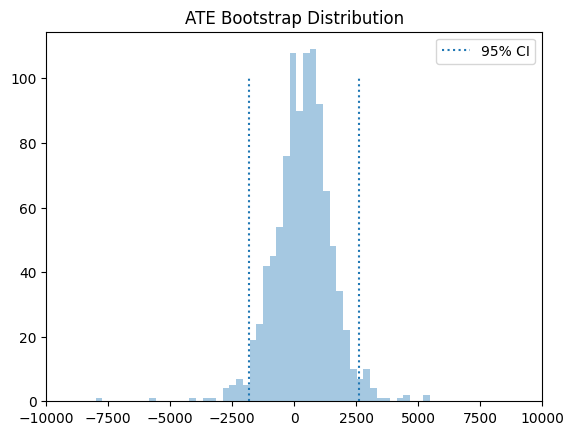

In [29]:
sns.distplot(ates, kde=False)
plt.vlines(np.percentile(ates, 2.5), 0, 100, linestyles="dotted")
plt.vlines(np.percentile(ates, 97.5), 0, 100, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.xlim([-10000, 10000])
plt.legend();

As you can see, even when we scale the effect by the first stage, it is still not statistically different from zero. This means that education doesn't increase earnings by a simple sheepskin effect, but rather by increasing one's productivity.

## Key Ideas

We learned how to take advantage of artificial discontinuities to estimate causal effects. The idea is that we will have some artificial threshold that makes the probability of treatment jump. One example that we saw was how age makes the probability of drinking jump at 21 years. We could use that to estimate the impact of drinking on mortality rate. We use the fact that very close to the threshold, we have something close to a randomized trial. Entities very close to the threshold could have gone either way and what determines where they've landed is essentially random. With this, we can compare those just above and just below to get the treatment effect. We saw how we could do that with weighted linear regression using a kernel and how this even gave us, for free, standard errors for our ATE.

Then, we look at what would happen in the fuzzy RD design, where we have non compliance. We saw how we could approach the situation much like we did with IV.


## References

I like to think of this entire book as a tribute to Joshua Angrist, Alberto Abadie and Christopher Walters for their amazing Econometrics class. Most of the ideas here are taken from their classes at the American Economic Association. Watching them is what is keeping me sane during this tough year of 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

I'll also like to reference the amazing books from Angrist. They have shown me that Econometrics, or 'Metrics as they call it, is not only extremely useful but also profoundly fun.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

Other important reference is Miguel Hernan and Jamie Robins' book. It has been my trustworthy companion in the most thorny causal questions I had to answer.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

- `The Effect` by Nick Huntington-Klein. [Link](https://theeffectbook.net/ch-RegressionDiscontinuity.html?panelset=python-code&panelset1=python-code2)

- Python Causality Handbook Master